In [136]:
import pandas as pd
# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [137]:
# Especificar la ruta del archivo
#data = pd.read_csv("/content/Bank_registries.csv")
data = pd.read_csv('Bank_registries.csv')
print(data)
data.info()

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age   
0             1    15634602   Hargrave          619    France  Female   42  \
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Limpieza de datos

Ignoramos las columnas RowNumber, CustomerID y Surname porque no aportan valor

One Hot Enconding consiste en binarizar variables categoricas

Dummy Encondig consiste en desdoblar una variable categorica en tantas columnas como niveles tenga, menos una.

In [139]:
# Eliminar las columnas innecesarias del DataFrame
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
data = data.drop(columns=columns_to_drop)


In [140]:
# Convertir columnas categóricas en one-hot encoding
data = pd.get_dummies(data, columns=['Geography'], prefix=['Country'])
# Convertir la columna "Gender" en variables one-hot
data = pd.get_dummies(data, columns=['Gender'])


#### Se tomarán 1000 ejemplos

In [141]:
# Cargar datos
data = data.head(1000)
#Mover la columna Exited a la ultima
Exited   = data['Exited']
# Eliminar la columna "Exited" del DataFrame original
data = data.drop(columns=['Exited'])

# Agregar la columna "Exited" al final del DataFrame
data['Exited'] = Exited  
# Convertir las columnas bool a int64
data['Country_France'] = data['Country_France'].astype(int)
data['Country_Germany'] = data['Country_Germany'].astype(int)
data['Country_Spain'] = data['Country_Spain'].astype(int)
data['Gender_Female'] = data['Gender_Female'].astype(int)
data['Gender_Male'] = data['Gender_Male'].astype(int)
# Verificar el tipo de datos después de la conversión


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Tenure           1000 non-null   int64  
 3   Balance          1000 non-null   float64
 4   NumOfProducts    1000 non-null   int64  
 5   HasCrCard        1000 non-null   int64  
 6   IsActiveMember   1000 non-null   int64  
 7   EstimatedSalary  1000 non-null   float64
 8   Country_France   1000 non-null   int32  
 9   Country_Germany  1000 non-null   int32  
 10  Country_Spain    1000 non-null   int32  
 11  Gender_Female    1000 non-null   int32  
 12  Gender_Male      1000 non-null   int32  
 13  Exited           1000 non-null   int64  
dtypes: float64(2), int32(5), int64(7)
memory usage: 90.0 KB


#### Considerando un porcentaje del 80% del total de los datos para entrenamiento y el 20% del total como datos de prueba

In [143]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [144]:
#print(train_data)
#print(test_data)

In [145]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      800 non-null    int64  
 1   Age              800 non-null    int64  
 2   Tenure           800 non-null    int64  
 3   Balance          800 non-null    float64
 4   NumOfProducts    800 non-null    int64  
 5   HasCrCard        800 non-null    int64  
 6   IsActiveMember   800 non-null    int64  
 7   EstimatedSalary  800 non-null    float64
 8   Country_France   800 non-null    int32  
 9   Country_Germany  800 non-null    int32  
 10  Country_Spain    800 non-null    int32  
 11  Gender_Female    800 non-null    int32  
 12  Gender_Male      800 non-null    int32  
 13  Exited           800 non-null    int64  
dtypes: float64(2), int32(5), int64(7)
memory usage: 78.1 KB


In [146]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 521 to 78
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      200 non-null    int64  
 1   Age              200 non-null    int64  
 2   Tenure           200 non-null    int64  
 3   Balance          200 non-null    float64
 4   NumOfProducts    200 non-null    int64  
 5   HasCrCard        200 non-null    int64  
 6   IsActiveMember   200 non-null    int64  
 7   EstimatedSalary  200 non-null    float64
 8   Country_France   200 non-null    int32  
 9   Country_Germany  200 non-null    int32  
 10  Country_Spain    200 non-null    int32  
 11  Gender_Female    200 non-null    int32  
 12  Gender_Male      200 non-null    int32  
 13  Exited           200 non-null    int64  
dtypes: float64(2), int32(5), int64(7)
memory usage: 19.5 KB


In [147]:
train_data.to_csv("train.csv", index=False)

In [148]:
test_data.to_csv("test.csv", index=False)

In [149]:
#Carga de dataset
data = pd.read_csv('train.csv')

In [150]:
X = data.iloc[:, :13]
y = data.iloc[:, 13]
m = y.size

In [151]:
print(X)
print('*'*25)
print(y)

     CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard   
0            411   29       0   59697.17              2          1  \
1            608   59       1       0.00              1          1   
2            664   57       6       0.00              2          1   
3            598   41       3   91536.93              1          1   
4            694   37       3       0.00              2          1   
..           ...  ...     ...        ...            ...        ...   
795          582   32       1   88938.62              1          1   
796          650   41       9       0.00              2          0   
797          667   43       8  190227.46              1          1   
798          762   51       3   99286.98              1          0   
799          738   31       9   82674.15              1          1   

     IsActiveMember  EstimatedSalary  Country_France  Country_Germany   
0                 1         53483.21               1                0  \
1            

In [152]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline


<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como:

$$ g(z) = \frac{1}{1+e^{-z}}$$

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [153]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [154]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [155]:
print(X)

[[  1. 411.  29. ...   0.   0.   1.]
 [  1. 608.  59. ...   0.   0.   1.]
 [  1. 664.  57. ...   0.   0.   1.]
 ...
 [  1. 667.  43. ...   0.   0.   1.]
 [  1. 762.  51. ...   0.   1.   0.]
 [  1. 738.  31. ...   0.   0.   1.]]


In [156]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [157]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [158]:
#Carga de dataset
data = pd.read_csv('test.csv')
print(data)

     CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard   
0            850   56       7  131317.48              1          1  \
1            525   36       2  114628.40              1          0   
2            618   24       7  128736.39              1          0   
3            632   41       3   81877.38              1          1   
4            850   38       1       0.00              2          1   
..           ...  ...     ...        ...            ...        ...   
195          668   37      10  152958.29              2          1   
196          663   44       2  117028.60              2          0   
197          643   45       5       0.00              1          1   
198          667   38       1   87202.38              1          1   
199          757   33       5   77253.22              1          0   

     IsActiveMember  EstimatedSalary  Country_France  Country_Germany   
0                 1        119175.45               1                0  \
1            

In [159]:
fila_deseada = 152

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[5.200000e+02 3.800000e+01 4.000000e+00 0.000000e+00 2.000000e+00
 1.000000e+00 0.000000e+00 5.638863e+04 1.000000e+00 0.000000e+00
 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5956\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5956\2268448176.py:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5956\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5956\2268448176.py:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5956\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5956\2268448176.py:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\Usuario\Ap

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5956\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5956\2268448176.py:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5956\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5956\2268448176.py:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5956\2268448176.py:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5956\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
C:\Users\Usuario\Ap

theta calculado por el descenso por el gradiente: [-5.87099107e-04 -7.75373949e-01  1.00894884e-01 -7.59263949e-03
  1.64383858e-01 -2.28139847e-03 -4.54839371e-04 -4.28971045e-03
 -1.32231251e-01 -2.10511929e-03  1.61879317e-03 -1.00772986e-04
  1.66921156e-03 -2.25631067e-03]
theta calculado por el descenso por el gradiente: [-5.87099107e-04 -7.75373949e-01  1.00894884e-01 -7.59263949e-03
  1.64383858e-01 -2.28139847e-03 -4.54839371e-04 -4.28971045e-03
 -1.32231251e-01 -2.10511929e-03  1.61879317e-03 -1.00772986e-04
  1.66921156e-03 -2.25631067e-03]
Un cliente con crédito : 850.0 y Edad: 56.0 (descenso por el gradiente):1.0


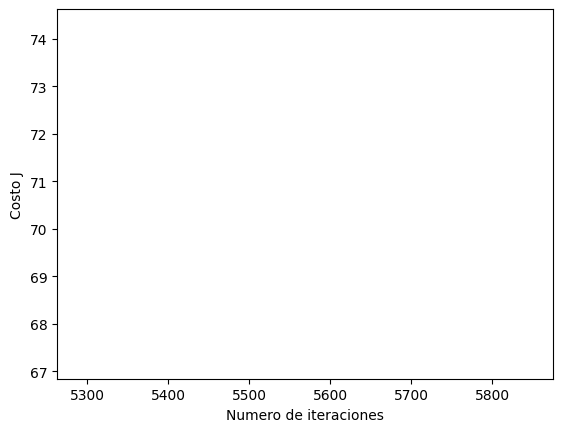

In [160]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.00001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(14)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

#X_array = np.array([0.9,5.200000e+02, 3.800000e+01, 4.000000e+00, 0.000000e+00, 2.000000e+00, 1.000000e+00, 0.000000e+00, 5.638863e+04, 1.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00])
X_array = np.array([1, 850, 56, 7, 131317.48, 1, 1, 119175.45, 1, 0, 0, 0, 1, 0])
# verificar si ingresa o no a la universidad
#X_array = np.array([525, 32, 4, 0.0, 2, 1, 0, 56388.63, True, False, False, True, False, 1])

aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

print(f"Un cliente con crédito : {X_array[1]} y Edad: {X_array[2]} (descenso por el gradiente):{aprueba}")




In [161]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [162]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[1, 850, 56, 7, 131317.48, 1, 1, 119175.45, 1, 0, 0, 0, 1, 0]\n')



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[3.00000000e-01 1.98947500e+02 1.04075000e+01 1.57812500e+00
 2.09209298e+04 4.78750000e-01 2.08125000e-01 1.88750000e-01
 2.97009722e+04 1.65625000e-01 5.37500000e-02 8.06250000e-02
 1.19375000e-01 1.80625000e-01]
Gradiente en theta inicial (zeros):
	[0.3000, 198.9475, 10.4075]
Gradiente esperado (aproximado):
	[1, 850, 56, 7, 131317.48, 1, 1, 119175.45, 1, 0, 0, 0, 1, 0]



In [163]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([1, 850, 56, 7, 131317.48, 1, 1, 119175.45, 1, 0, 0, 0, 1, 0])

#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.14f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.14f}, {:.14f}, {:.14f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[1, 850, 56, 7, 131317.48, 1, 1, 119175.45, 1, 0, 0, 0, 1, 0]')

[1.0000000e+00 8.5000000e+02 5.6000000e+01 7.0000000e+00 1.3131748e+05
 1.0000000e+00 1.0000000e+00 1.1917545e+05 1.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
Costo en theta prueba: nan
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[0.80000000000000, 524.05375000000004, 29.80875000000000]
Gradiente esperado (aproximado):
	[1, 850, 56, 7, 131317.48, 1, 1, 119175.45, 1, 0, 0, 0, 1, 0]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5956\1056559099.py:10: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


#### 1.2.3 Parámetros de aprendizaje usando `scipy.optimize`

In [164]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.14f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.14f}, {:.14f}, {:.14f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[1, 850, 56, 7, 131317.48, 1, 1, 119175.45, 1, 0, 0, 0, 1, 0]')

Costo con un valor de theta encontrado por optimize.minimize: 0.40220038150944
Costo esperado (aproximado): 0.203

theta:
	[-0.95351607709201, -0.00262246321743, 0.08704033009193]
Theta esperado (aproximado):
	[1, 850, 56, 7, 131317.48, 1, 1, 119175.45, 1, 0, 0, 0, 1, 0]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5956\2437472593.py:7: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,


In [165]:
# verificar si ingresa o no a la universidad
X_array = [1, 850, 56, 7, 131317.48, 1, 1, 119175.45, 1, 0, 0, 0, 1, 0]
theta_om = [-25.161, 0.206, 0.201,-25.161, 0.206, 0.201,-25.161, 0.206, 0.201,-25.161, 0.206,-25.161, 0.206, 0.201,]
aprueba = sigmoid(np.dot(X_array, theta_om))   # Se debe cambiar esto
print(f"Un cliente con crédito : {X_array[1]} y Edad: {X_array[2]} (descenso por el gradiente):{aprueba}")


Un cliente con crédito : 850 y Edad: 56 (descenso por el gradiente):1.0


<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

In [166]:
def predict(theta, X):
   
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [167]:

prob = sigmoid(np.dot([1, 850, 56, 7, 131317.48, 1, 1, 119175.45, 1, 0, 0, 0, 1, 0], theta))


print('Un cliente con crédito 850 y edad 56, se predice una probabilidad de retirada del banco de: {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Un cliente con crédito 850 y edad 56, se predice una probabilidad de retirada del banco de: 0.000%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 83.00 %
Precisión esperada (aproximadamente): 89.00 %


C:\Users\Usuario\AppData\Local\Temp\ipykernel_5956\714609262.py:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
